In [44]:
import pandas as pd
import numpy as np

In [45]:
df=pd.read_csv('faa_ai_prelim.csv')
df.shape

(83, 42)

In [46]:
df.describe()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UPDATED              83 non-null     object 
 1   ENTRY_DATE           83 non-null     object 
 2   EVENT_LCL_DATE       83 non-null     object 
 3   EVENT_LCL_TIME       83 non-null     object 
 4   LOC_CITY_NAME        83 non-null     object 
 5   LOC_STATE_NAME       83 non-null     object 
 6   LOC_CNTRY_NAME       2 non-null      object 
 7   RMK_TEXT             83 non-null     object 
 8   EVENT_TYPE_DESC      83 non-null     object 
 9   FSDO_DESC            81 non-null     object 
 10  REGIST_NBR           83 non-null     object 
 11  FLT_NBR              6 non-null      object 
 12  ACFT_OPRTR           7 non-null      object 
 13  ACFT_MAKE_NAME       78 non-null     object 
 14  ACFT_MODEL_NAME      79 non-null     object 
 15  ACFT_MISSING_FLAG    0 non-null      float

UPDATED                 0
ENTRY_DATE              0
EVENT_LCL_DATE          0
EVENT_LCL_TIME          0
LOC_CITY_NAME           0
LOC_STATE_NAME          0
LOC_CNTRY_NAME         81
RMK_TEXT                0
EVENT_TYPE_DESC         0
FSDO_DESC               2
REGIST_NBR              0
FLT_NBR                77
ACFT_OPRTR             76
ACFT_MAKE_NAME          5
ACFT_MODEL_NAME         4
ACFT_MISSING_FLAG      83
ACFT_DMG_DESC           9
FLT_ACTIVITY           70
FLT_PHASE               1
FAR_PART               82
MAX_INJ_LVL            64
FATAL_FLAG             75
FLT_CRW_INJ_NONE       19
FLT_CRW_INJ_MINOR      77
FLT_CRW_INJ_SERIOUS    82
FLT_CRW_INJ_FATAL      75
FLT_CRW_INJ_UNK        83
CBN_CRW_INJ_NONE       83
CBN_CRW_INJ_MINOR      83
CBN_CRW_INJ_SERIOUS    83
CBN_CRW_INJ_FATAL      83
CBN_CRW_INJ_UNK        82
PAX_INJ_NONE           66
PAX_INJ_MINOR          82
PAX_INJ_SERIOUS        80
PAX_INJ_FATAL          82
PAX_INJ_UNK            83
GRND_INJ_NONE          83
GRND_INJ_MIN

In [47]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [48]:
for col in numeric_cols:
    df[col].fillna(df[col].mean(), inplace=True)

C:\Users\sahil\AppData\Local\Temp\ipykernel_22392\1203606999.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [49]:
for col in categorical_cols:
    df[col].fillna('Unknown', inplace=True)

C:\Users\sahil\AppData\Local\Temp\ipykernel_22392\2383048195.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Unknown', inplace=True)


In [50]:
df.isnull().sum()

UPDATED                 0
ENTRY_DATE              0
EVENT_LCL_DATE          0
EVENT_LCL_TIME          0
LOC_CITY_NAME           0
LOC_STATE_NAME          0
LOC_CNTRY_NAME          0
RMK_TEXT                0
EVENT_TYPE_DESC         0
FSDO_DESC               0
REGIST_NBR              0
FLT_NBR                 0
ACFT_OPRTR              0
ACFT_MAKE_NAME          0
ACFT_MODEL_NAME         0
ACFT_MISSING_FLAG      83
ACFT_DMG_DESC           0
FLT_ACTIVITY            0
FLT_PHASE               0
FAR_PART                0
MAX_INJ_LVL             0
FATAL_FLAG              0
FLT_CRW_INJ_NONE        0
FLT_CRW_INJ_MINOR       0
FLT_CRW_INJ_SERIOUS     0
FLT_CRW_INJ_FATAL       0
FLT_CRW_INJ_UNK        83
CBN_CRW_INJ_NONE       83
CBN_CRW_INJ_MINOR      83
CBN_CRW_INJ_SERIOUS    83
CBN_CRW_INJ_FATAL      83
CBN_CRW_INJ_UNK         0
PAX_INJ_NONE            0
PAX_INJ_MINOR           0
PAX_INJ_SERIOUS         0
PAX_INJ_FATAL           0
PAX_INJ_UNK            83
GRND_INJ_NONE          83
GRND_INJ_MIN

In [51]:
from sklearn.preprocessing import OneHotEncoder

# Use sparse_output=False instead of sparse=False
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform categorical data
categorical_encoded = encoder.fit_transform(df[categorical_cols])

# Get feature names
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)

# Create DataFrame from encoded array
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=encoded_feature_names)

# Combine numeric and encoded categorical columns
df = pd.concat([df[numeric_cols].reset_index(drop=True), categorical_encoded_df.reset_index(drop=True)], axis=1)


In [52]:
df.shape
df = df.dropna(axis=1)

# Recompute numeric and categorical columns after dropping
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [53]:
from sklearn.preprocessing import StandardScaler
X = df
X = X.fillna(X.mean())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 
X_original = X_scaled


In [54]:
mu = X_scaled.mean(axis=0)  
A = X_scaled - mu  

In [55]:
def power_iteration_sym(M, max_iter=1000, tol=1e-9):
    d = M.shape[0]
    
    v = np.random.randn(d)
    v /= np.linalg.norm(v) + 1e-15

    last_val = 0.0
    for _ in range(max_iter):
        w = M @ v
        norm_w = np.linalg.norm(w)
        if norm_w < 1e-15:
            # M is singular in this direction
            return 0.0, v
        v = w / norm_w
        # Rayleigh quotient gives eigenvalue estimate
        val = float(v.T @ (M @ v))
        if abs(val - last_val) < tol * max(1.0, abs(last_val)):
            break
        last_val = val
    return val, v

In [56]:
def top_k_eig_power_deflation(M, k, max_iter=1000, tol=1e-9):
    d = M.shape[0]
    V = np.zeros((d, k))
    vals = np.zeros(k)

    # We maintain a working copy for deflation
    M_work = M.copy()

    for j in range(k):
        val, vec = power_iteration_sym(M_work, max_iter=max_iter, tol=tol)

        # Re-orthogonalize vec against previously found vectors (stabilizes numerics)
        if j > 0:
            # Gram-Schmidt
            proj = V[:, :j] @ (V[:, :j].T @ vec)
            vec = vec - proj
            nrm = np.linalg.norm(vec)
            if nrm > 1e-15:
                vec = vec / nrm
            else:
                # If it collapses numerically, just return what we have
                vals = vals[:j]
                V = V[:, :j]
                break

            # Recompute eigenvalue after orthogonalization
            val = float(vec.T @ (M @ vec))

        vals[j] = val
        V[:, j] = vec

        # Rank-1 deflation: remove this eigen-direction
        # Safe because M is symmetric: M <- M - lambda * v v^T
        M_work = M_work - val * np.outer(vec, vec)

    # Ensure descending order (power+deflation should already produce descending, but just in case)
    order = np.argsort(-vals)
    return vals[order], V[:, order]

In [57]:
candidate_ns = [1, 2, 3,4, 5,6, 7,8,9, 10,11,12, 15,20,25,30,35,40,45,50,70,90,100,120,150]
candidate_ns = [n for n in candidate_ns if n <= A.shape[1]]

In [58]:
candidate_ns

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 15,
 20,
 25,
 30,
 35,
 40,
 45,
 50,
 70,
 90,
 100,
 120,
 150]

In [59]:
errors = []
 # Centered data
C= (A.T @ A) / A.shape[0]  # Covariance matrix
for n in candidate_ns:
    evals_n, evecs_n = top_k_eig_power_deflation(C, k=n, max_iter=2000, tol=1e-10)
    
    # Project and reconstruct
    Z = A @ evecs_n               # (n_samples, n)
    X_rec = Z @ evecs_n.T + mu    # (n_samples, d)
    
    # Compute SSE
    err = float(np.sum((X_original  - X_rec) ** 2))
    errors.append(err)
    print(f"n={n:>2} | Reconstruction Error = {err:.6f}")


n= 1 | Reconstruction Error = 45228.866105
n= 2 | Reconstruction Error = 44132.083291
n= 3 | Reconstruction Error = 43199.580232
n= 4 | Reconstruction Error = 42316.234796
n= 5 | Reconstruction Error = 41471.008640
n= 6 | Reconstruction Error = 40644.010619
n= 7 | Reconstruction Error = 39819.848952
n= 8 | Reconstruction Error = 39001.248394
n= 9 | Reconstruction Error = 38209.176076
n=10 | Reconstruction Error = 37452.214974
n=11 | Reconstruction Error = 36701.347512
n=12 | Reconstruction Error = 35963.363169
n=15 | Reconstruction Error = 33785.144723
n=20 | Reconstruction Error = 30332.863275
n=25 | Reconstruction Error = 27059.064527
n=30 | Reconstruction Error = 23919.330941
n=35 | Reconstruction Error = 20931.172331
n=40 | Reconstruction Error = 18085.792851
n=45 | Reconstruction Error = 15360.706826
n=50 | Reconstruction Error = 12773.614259
n=70 | Reconstruction Error = 3886.788190
n=90 | Reconstruction Error = 0.102249
n=100 | Reconstruction Error = 0.053917
n=120 | Reconstruct

In [60]:
evals_std, evecs_std = np.linalg.eigh(C)
idx = np.argsort(evals_std)[::-1]
evals_std = evals_std[idx]
evecs_std = evecs_std[:, idx]

In [61]:
errors_std = []
for n in candidate_ns:
    Z_std = A @ evecs_std[:, :n]
    X_rec_std = Z_std @ evecs_std[:, :n].T + mu
    err_std = float(np.sum((X_original - X_rec_std) ** 2))
    errors_std.append(err_std)


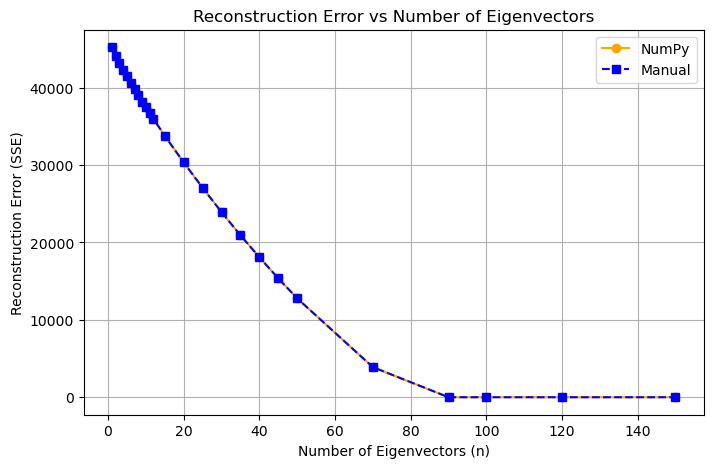

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(candidate_ns, errors_std, 'o-', color='orange', label='NumPy')
plt.plot(candidate_ns, errors, 's--', color='blue', label='Manual')  # Add manual implementation
plt.xlabel('Number of Eigenvectors (n)')
plt.ylabel('Reconstruction Error (SSE)')
plt.title('Reconstruction Error vs Number of Eigenvectors')
plt.legend()
plt.grid(True)
plt.show()
